In [1]:
import pandas as pd

# Q1

In [2]:
def num(number=111111):
    if number<0:
        return "This function only supports positive number"
    ls_num = list(str(number))
    return "".join(sorted(ls_num,reverse=True))
    
print(num(43905))
print(num(584366))

95430
866543


# Q2. a

In [3]:
df=pd.read_csv('JEOPARDY_CSV.csv')
df

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
...,...,...,...,...,...,...,...
216925,4999,5/11/2006,Double Jeopardy!,RIDDLE ME THIS,"$2,000",This Puccini opera turns on the solution to 3 ...,Turandot
216926,4999,5/11/2006,Double Jeopardy!,"""T"" BIRDS","$2,000",In North America this term is properly applied...,a titmouse
216927,4999,5/11/2006,Double Jeopardy!,AUTHORS IN THEIR YOUTH,"$2,000","In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker
216928,4999,5/11/2006,Double Jeopardy!,QUOTATIONS,"$2,000","From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo


In [4]:
df.shape[0]

216930

There are 216930 rows. Each row represent a jeopardy question.

# Q2.b

In [5]:
df.dtypes

Show Number     int64
 Air Date      object
 Round         object
 Category      object
 Value         object
 Question      object
 Answer        object
dtype: object

In [6]:
df[' Air Date'] = pd.to_datetime(df[' Air Date'])
df.dtypes

Show Number             int64
 Air Date      datetime64[ns]
 Round                 object
 Category              object
 Value                 object
 Question              object
 Answer                object
dtype: object

In [7]:
group_year=df.groupby(df[' Air Date'].dt.year)
shows=group_year['Show Number'].nunique()

unique_shows=pd.DataFrame({"Show":shows})
unique_shows

,Show
Air Date,
1984,23
1985,16
1986,25
1987,22
1988,22
1989,36
1990,73
1991,24
1992,32


# Q2.c,d

df[' Value']=df[' Value'].str.replace('$','')
df[' Value']=df[' Value'].str.replace(',','')
df[' Value']=df[' Value'].str.replace(' ','')
df[' Value']=df[' Value'].str.replace('None','')
df[' Value'] =  pd.to_numeric(df[' Value'])

In [8]:
df.dtypes

Show Number             int64
 Air Date      datetime64[ns]
 Round                 object
 Category              object
 Value                 object
 Question              object
 Answer                object
dtype: object

### How many questions were asked in each round of the game in all these years?

In [9]:
#group the data by rounds
rounds_group= df.groupby(' Round')

#count the # of question in every round
q_per_round=rounds_group[' Question'].count()

# create the df to display # of questions that were asked
answer = pd.DataFrame({" Question": q_per_round})
answer

,Question
Round,
Double Jeopardy!,105912
Final Jeopardy!,3631
Jeopardy!,107384
Tiebreaker,3


# Q3

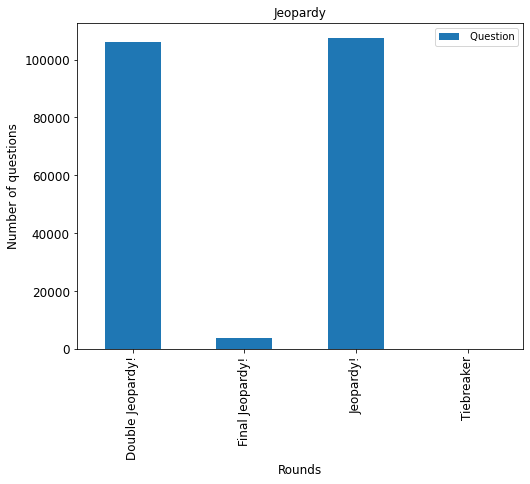

In [19]:
import matplotlib.pyplot as plt
ax = answer.plot(kind='bar', title ="Jeopardy", figsize=(8, 6), legend=True, fontsize=12)
ax.set_xlabel("Rounds", fontsize=12)
ax.set_ylabel("Number of questions", fontsize=12)
plt.show()

This graph shows the number of questions in each round. This helps us to see majority of data or questions are from jeopardy and double jeopardy rounds. There's very few from final jeorpardy and barely any from tiebreaker rounds.